In [100]:
import os
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
from bqplot import pyplot as plt # visualization lib built on top of ipywidgets
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
#from IPython.display import display, Markdown, clear_output

In [42]:
#abs_dir = os.getcwd()
#data_dir = os.path.join(abs_dir + '/T17PKK_20190106T160511_TCI_10m.jp2')

In [44]:
#with rio.open(data_dir) as src:
#    naip_csf = src.read()
#    naip_csf_meta = src.meta

/usr/local/lib/python3.7/site-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [47]:
#naip_csf.shape #(why there are 4 dims in the RGB image?)

In [4]:
#red = naip_csf[0]
#green = naip_csf[1]
#blue = naip_csf[2]

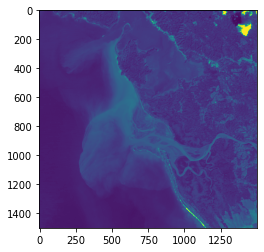

In [70]:
#g_small = green[4500:6000, 5500:7000]

#fig = plt.imshow(g_small);
#plt.title("Golfo Dulce, Costa Rica")
#plt.savefig('example.png')

In [80]:
#pd.DataFrame(g_small).to_csv("g_small.csv", index=False)

In [85]:
g_small = pd.read_csv('g_small.csv', index_col=0)

In [87]:
array = g_small.to_numpy()
#array

array([[ 33,  33,  34, ..., 255, 254, 255],
       [ 34,  34,  34, ..., 254, 255, 255],
       [ 34,  34,  34, ..., 255, 255, 255],
       ...,
       [ 23,  23,  22, ...,  61,  59,  58],
       [ 25,  24,  22, ...,  62,  59,  59],
       [ 21,  22,  23, ...,  62,  61,  59]])

In [89]:
green = array

In [90]:
class Image_select:
    def __init__(self, image, logitude = 1500, latitude = 1500):
        self.image = image[0: logitude, 0: latitude]
        self.logitude = logitude
        self.latitude = latitude

In [91]:
small_green = Image_select(green) # initiate the class

In [8]:
#small_green.image

In [9]:
#to show the entire image
#fig = plt.imshow(small_green.image)
#fig.set_cmap('gist_earth')
#plt.show()

In [10]:
# create logo and title
file = open("/Users/wentingjiang/Downloads/a_possible_logo.png", "rb")
image = file.read()
logo = widgets.Image(
    value=image,
    format='png',
    width=300,
    height=400,
)
logo

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xc8\x00\x00\x00\xc8\x08\x06\x00\x00\x00\xadX\xae…

In [11]:
w = widgets.HTML(
    value="<b><font color='green'>Find Coral Better Homes</b>",
    #placeholder='Some HTML',
    #description='Some HTML',
)
w.add_class("mytext")
w

HTML(value="<b><font color='green'>Find Coral Better Homes</b>", _dom_classes=('mytext',))

In [12]:
import datetime
date_object = datetime.date.today()

today_date = widgets.HTML(
    value="Today's Date: " + str(date_object) + '',
    #placeholder='Some HTML',
    #description='Some HTML',
)
today_date

HTML(value="Today's Date: 2020-04-09")

In [13]:
w = widgets.HTML(
    value="<b><font color='black'>Please select your area of interest</b>",
    #placeholder='Some HTML',
    #description='Some HTML',
)
w.add_class("mytext")
w

HTML(value="<b><font color='black'>Please select your area of interest</b>", _dom_classes=('mytext',))

In [14]:
aoi = widgets.Dropdown(
       options=['Golfo Dulce', 'other'],
       value='Golfo Dulce',
       description='AOI:')
aoi

Dropdown(description='AOI:', options=('Golfo Dulce', 'other'), value='Golfo Dulce')

In [15]:
widgets.HTML(
    value="Specify latitude and logitude of corals: indicated by the <b><font color='red'>red dots</b>",
    #placeholder='Some HTML',
    #description='Some HTML',
)

HTML(value="Specify latitude and logitude of corals: indicated by the <b><font color='red'>red dots</b>")

In [16]:
corals_latitude = widgets.Text(
    value='500',
    placeholder='Type something',
    description='latitude:',
    disabled=False
)

In [17]:
corals_latitude

Text(value='1000', description='latitude:', placeholder='Type something')

In [18]:
corals_longitude = widgets.Text(
    value='500',
    placeholder='Type something',
    description='longitude:',
    disabled=False
)

In [19]:
corals_longitude

Text(value='1000', description='longitude:', placeholder='Type something')

In [36]:
widgets.HTML(
    value="Slide the latitude & longtidue in the map <b><font color='black'>to find your areas of interest</b>",
    #placeholder='Some HTML',
    #description='Some HTML',
)

HTML(value="Slide the latitude & longtidue in the map <b><font color='black'>to find your areas of interest</b…

In [92]:
# with the coral info added
def f(x, y):
    #plt.figure(2)
    #x = np.linspace(-10, 10, num=1000)
    fig, ax = plt.subplots()
    small_green.latitude = x
    small_green.logitude = y
    fig = plt.imshow(small_green.image[small_green.latitude[0]: small_green.latitude[1], small_green.logitude[0]: small_green.logitude[1]])
    circle1 = plt.Circle((int(corals_latitude.value), int(corals_longitude.value)), 50, color='r')
    ax.add_artist(circle1)
    plt.show()
    
interactive_plot = interactive(f, x=
                               widgets.IntRangeSlider(
    value=[100, 1500],
    min=0,
    max=1500,
    step=1,
    description='Latitude:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
), y=widgets.IntRangeSlider(
    value=[100,1500],
    min=0,
    max=1500,
    step=1,
    description='Longitude:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntRangeSlider(value=(100, 1500), continuous_update=False, description='Latitude:', max=…

In [93]:
# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )
calendar_start = widgets.DatePicker(
           description='Starting Date')
calendar_end = widgets.DatePicker(
           description='Ending Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['sediment', 'vegetation'],
       value='sediment',
       description='Factors:')
checkbox = widgets.Checkbox(
           description='Check to invert',)

In [94]:
box1 = widgets.VBox([menu, calendar_start])
box2 = widgets.VBox([calendar_end])

In [95]:
factor_text = widgets.HTML(
    value="To analyse changes in the factor, please specify a data range",
    #placeholder='Some HTML',
    #description='Some HTML',
)
factor_text

HTML(value='To analyse changes in the factor, please specify a data range')

In [26]:
factor_analysis = widgets.VBox([box1, box2])
factor_analysis

In [96]:
from sklearn.cluster import KMeans
flatten_x = small_green.image[small_green.latitude[0]: small_green.latitude[1], small_green.logitude[0]: small_green.logitude[1]].reshape(-1, 1)
X = flatten_x
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

In [97]:
g_small = small_green.image[small_green.latitude[0]: small_green.latitude[1], small_green.logitude[0]: small_green.logitude[1]]
g_small_shape = list(g_small.shape)
g_reshaped = y_kmeans.reshape(g_small_shape)
temp2 = g_reshaped.copy()
temp2[temp2 != 1] = 0
count_sediment = np.count_nonzero(temp2 == 1)
#print(count_sediment)

In [98]:
#%matplotlib inline

button2 = widgets.Button(description="Classify sediment")
button2.style.button_color = 'lightgreen'
out2 = widgets.Output()

def on_button_clicked(_):
    with out2:
        #clear_output()
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(g_small)
        ax[1].imshow(temp2)
        plt.title("Display classified sediment - Golfo Dulce, Costa Rica")
        plt.show()
        
button2.on_click(on_button_clicked)

widgets.VBox([button2,out2])        


In [99]:
button = widgets.Button(description='Calculate sediment')
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
        with out:
          # what happens when we press the button
            #clear_output()
            print('There are ' + str(count_sediment *100 /10000) + 'km2 of sediment')
            #x = np.linspace(0, 10, 1000)
            #plt.plot(x, x + 0, linestyle='solid')
            #plt.title('sendimentation over time')
            #plt.xlabel('years')
            #plt.ylabel('amount of sedimentation')
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])